## Step 1: Change hardware accelerator to GPU and clone the repository

First, ensure that you are using a GPU runtime. In the top left hand corner of the window, click *Runtime > Change runtime type* and then under *Hardware Accelerator*, click the dropdown and select *GPU*.

<table><tr>
<td> 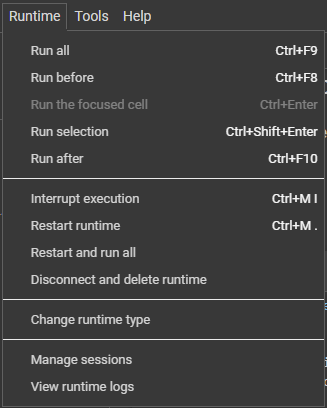 </td>


<td> 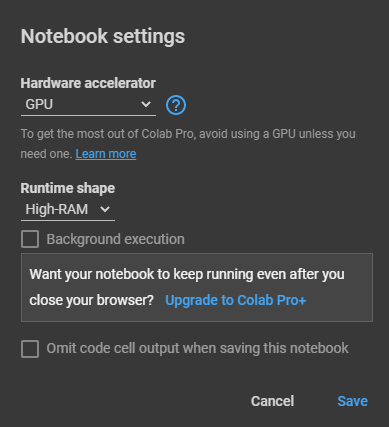 </td>
</tr></table>

In [1]:
!git clone https://github.com/GeorgiadeG/CoPFGM.git

import os
os.chdir("CoPFGM")

!pip install -r requirements.txt

Cloning into 'CoPFGM'...
remote: Enumerating objects: 1350, done.
remote: Counting objects: 100% (1350/1350), done.
remote: Compressing objects: 100% (1281/1281), done.
remote: Total 1350 (delta 120), reused 1290 (delta 60), pack-reused 0
Receiving objects: 100% (1350/1350), 4.28 MiB | 22.47 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 94.4 MB/s eta 0:

#### **IMPORTANT**
Runtime -> Restart Runtime

Ensure Python3 and CUDA versions as proposed with the requirements.txt

In [1]:
!python3 --version  # 3.10.12
!nvcc --version     # 11.8.x

Python 3.10.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


Change root directory for later

In [2]:
import os
os.chdir("CoPFGM")
rootdir = os.getcwd()

Testing that PyTorch is indeed correctly setup with Cuda and the Google colab.

In [3]:
import torch

torch.cuda.get_device_name(0) # NVIDIA A100-SXM4-40GB , for Colab Pro + for example

'NVIDIA A100-SXM4-40GB'

## Train a model with MNIST or Dilbert data set


In [ ]:
!python3 main.py --config ./configs/poisson/mnist_config.py --mode train --workdir copfgm_mnist

In [ ]:
!python3 main.py --config ./configs/poisson/faces_config.py --mode train --workdir copfgm_dilbert

## Sample 100 images from the trained model (example)

Keep in mind the eval.begin_ckpt should be = desried_checkpoint/snapshot_frequency

Similarly someone can sample from dilbert ds



In [ ]:
!python3 main.py --config ./configs/poisson/mnist_config.py  --mode eval --workdir copfgm_mnist/ \
--config.eval.enable_sampling --config.eval.save_images --config.eval.batch_size 100 \
--config.eval.batch_size 1 --config.sampling.target 0 --config.eval.begin_ckpt 1 --config.eval.end_ckpt 2

### Calculate FID/IS score for a model

In order to calculate those metrics, you need the real statistics, you can either manually download them and put them to \assets directory, or you can download with the following

In [6]:
import os
os.chdir('assets')
!gdown 1Q6tQ7sSpGLEL7lwnkX2ThMr84ws5vyC3
!gdown 1hecVSJMK0Ga4kbjdw0rkiJ3p-MX6Lnlk
os.chdir('..')

Downloading...
From: https://drive.google.com/uc?id=1Q6tQ7sSpGLEL7lwnkX2ThMr84ws5vyC3
To: /content/CoPFGM/assets/real_dilbert_statistics.npz
100% 9.09M/9.09M [00:00<00:00, 94.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hecVSJMK0Ga4kbjdw0rkiJ3p-MX6Lnlk
To: /content/CoPFGM/assets/real_mnist_statistics.npz
100% 819k/819k [00:00<00:00, 147MB/s]


And then you can run the scores with:

In [22]:
!python3 main.py --config ./configs/poisson/faces_config.py  --mode eval --workdir copfgm_dilbert/ \
--config.sampling.target 4 --config.eval.enable_sampling --config.eval.num_samples 100 --config.eval.begin_ckpt 26 --config.eval.end_ckpt 27

2023-06-26 19:00:34.999782: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2023-06-26 19:00:41.916578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 19:00:41.991339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38560 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0
1 Physical GPUs, 1 Logical GPUs
I0626 19:00:42.018453 140146723178304 xla_bridge.p

# Download the model checkpoint

### MNIST

In [7]:
os.makedirs("pre_trained_mnist/checkpoints")
os.chdir("pre_trained_mnist/checkpoints")

In [8]:
!gdown 1Ei2r1r9Tu0iFUTXMmgYhadXhTwhOlqhK

Downloading...
From: https://drive.google.com/uc?id=1Ei2r1r9Tu0iFUTXMmgYhadXhTwhOlqhK
To: /content/CoPFGM/pre_trained_mnist/checkpoints/checkpoint_100000.pth
100% 990M/990M [00:11<00:00, 86.9MB/s]


In [10]:
os.chdir("../..")

In [20]:
!python3 main.py --config ./configs/poisson/mnist_config.py  --mode eval --workdir pre_trained_dilbert/ \
--config.eval.enable_sampling --config.eval.save_images --config.eval.batch_size 100 \
-config.sampling.target 0 --config.eval.begin_ckpt 10 --config.eval.end_ckpt 11


2023-06-26 18:59:13.976944: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2023-06-26 18:59:20.924426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 18:59:21.023343: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38560 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0
1 Physical GPUs, 1 Logical GPUs
--- sampling eps: 0.001
I0626 18:59:22.059324 1403

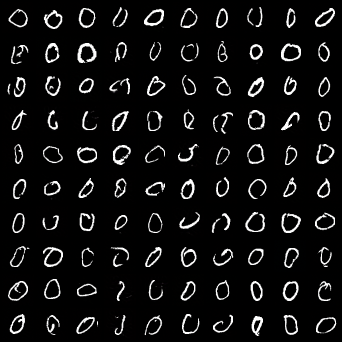

In [12]:
from IPython.display import Image
Image('pre_trained_mnist/eval/ode_images_10.png')

Calculate the FID and IS scores for MNIST pretrained model

In [ ]:
!python3 main.py --config ./configs/poisson/mnist_config.py  --mode eval --workdir pre_trained_mnist/ \
--config.sampling.target 4 --config.eval.enable_sampling --config.eval.num_samples 100 --config.eval.begin_ckpt 10 --config.eval.end_ckpt 11

2023-06-26 19:00:34.999782: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



### Dilbert

In [13]:
os.makedirs("pre_trained_dilbert/checkpoints")
os.chdir("pre_trained_dilbert/checkpoints")

In [14]:
!gdown 1vgxw1zRrG6jAQIJj02WOGahCcJPWMbHk

Downloading...
From: https://drive.google.com/uc?id=1vgxw1zRrG6jAQIJj02WOGahCcJPWMbHk
To: /content/CoPFGM/pre_trained_dilbert/checkpoints/checkpoint_13000.pth
100% 990M/990M [00:07<00:00, 127MB/s]


In [16]:
os.chdir("../..")

In [17]:
!python3 main.py --config ./configs/poisson/faces_config.py  --mode eval --workdir pre_trained_dilbert/ \
--config.eval.enable_sampling --config.eval.save_images --config.eval.batch_size 100 \
-config.sampling.target 2 --config.eval.begin_ckpt 26 --config.eval.end_ckpt 27


2023-06-26 18:55:24.043394: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2023-06-26 18:55:30.895194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 18:55:30.970886: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38560 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0
1 Physical GPUs, 1 Logical GPUs
--- sampling eps: 0.001
I0626 18:55:32.060199 1405

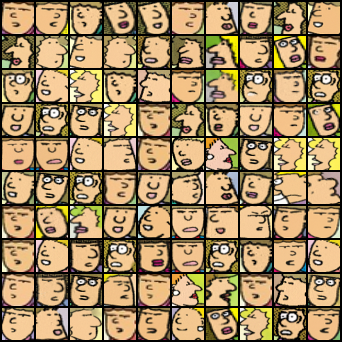

In [18]:
from IPython.display import Image
Image('pre_trained_dilbert/eval/ode_images_26.png')

Calculate the FID and IS scores for the pretrained

In [ ]:
!python3 main.py --config ./configs/poisson/faces_config.py  --mode eval --workdir pre_trained_dilbert/ \
--config.sampling.target 4 --config.eval.enable_sampling --config.eval.num_samples 100 --config.eval.begin_ckpt 26 --config.eval.end_ckpt 27

2023-06-26 19:00:34.999782: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

